In [11]:
import matplotlib.pyplot as plt

def histogram(raw_meas, title):
    plt.title(title)
    plt.xlabel('Latency in # of clk')
    plt.ylabel('Count')
    bins = 256
    plt.hist(raw_meas, bins=bins, log=True,
             label=f'measured data')
    plt.grid()
    plt.legend(loc='upper right')

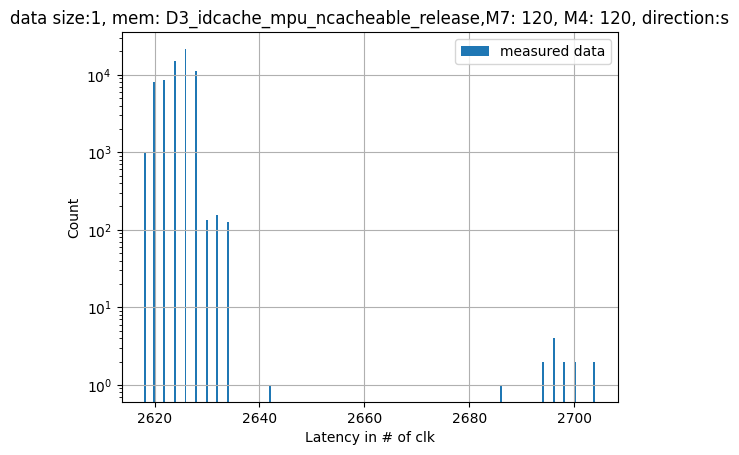

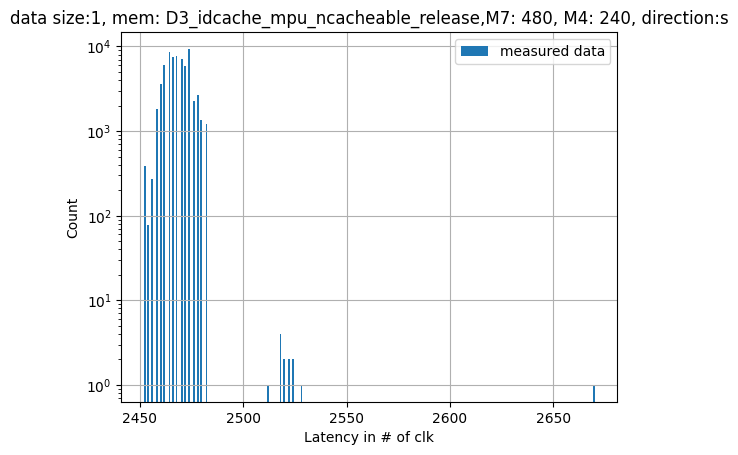

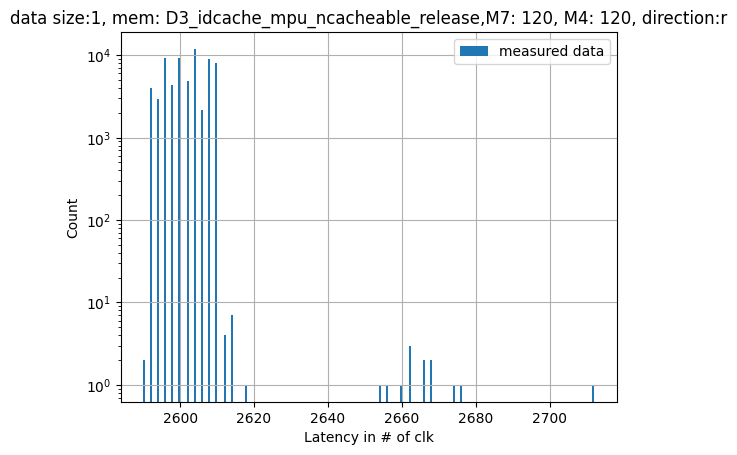

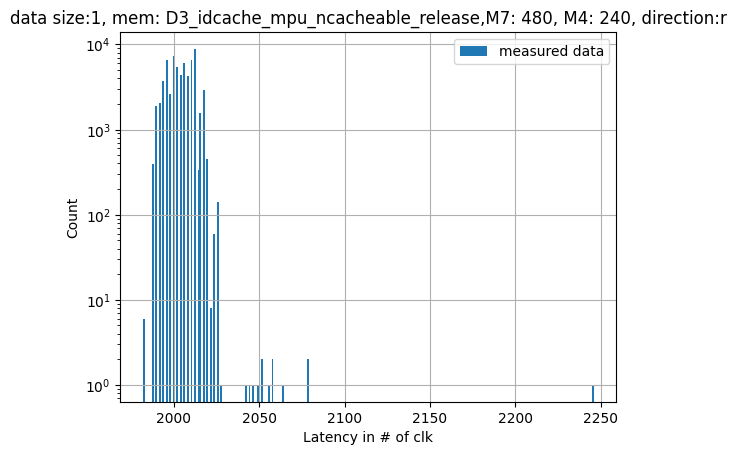

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import os

import measurement
import visu_common

mem = 'D3_idcache_mpu_ncacheable_release'
dir_prefix = os.path.join('pilot', mem)

directions = ['s', 'r']
for direction in directions:
    clocks = visu_common.get_clocks_in_folder(dir_prefix, prefix=f'meas_{direction}_')
    for m7, m4 in clocks:
        measurement_folder = os.path.join(dir_prefix, f'meas_{direction}_{m7}_{m4}')
        sizes = [1] #visu_common.get_sizes(measurement_folder)
        raw = measurement.read_meas_from_files(sizes, measurement_folder)
        
        # for raw_per_size, size in raw, sizes:
        plt.figure()
        title = f'data size:{sizes[0]}, mem: {mem},' \
                f'M7: {m7}, M4: {m4}, direction:{direction}'
        histogram(raw, title)



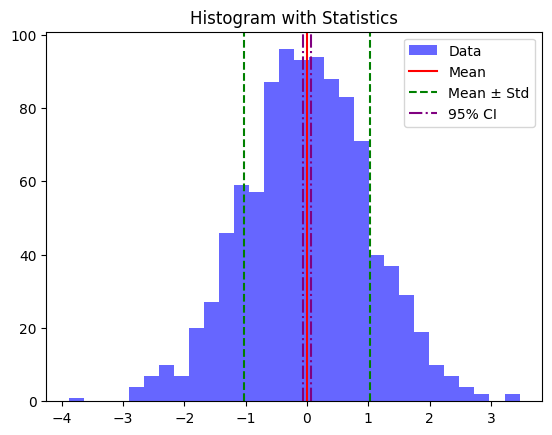

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate some sample data
data = np.random.randn(1000)

# Calculate statistics
mean = np.mean(data)
std = np.std(data)
conf_int = stats.norm.interval(0.95, loc=mean, scale=std/np.sqrt(len(data)))  # 95% CI for a normal distribution

# Plot histogram
plt.hist(data, bins=30, alpha=0.6, color='b', label='Data')
plt.axvline(mean, color='red', linestyle='-', label='Mean')
plt.axvline(mean - std, color='green', linestyle='--', label='Mean ± Std')
plt.axvline(mean + std, color='green', linestyle='--')
plt.axvline(conf_int[0], color='purple', linestyle='-.', label='95% CI')
plt.axvline(conf_int[1], color='purple', linestyle='-.')

plt.legend()
plt.title('Histogram with Statistics')
plt.show()

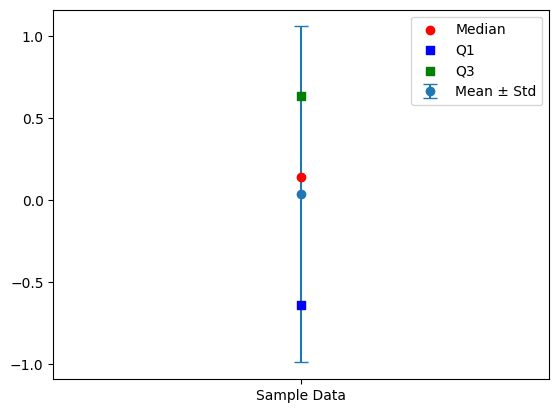

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Some sample data
data = np.random.randn(100)

mean = np.mean(data)
std = np.std(data)
median = np.median(data)
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
min_val = np.min(data)
max_val = np.max(data)

plt.errorbar(['Sample Data'], [mean], yerr=std, fmt='o', label='Mean ± Std', capsize=5)
plt.scatter(['Sample Data'], [median], color='red', label='Median', zorder=5)
plt.scatter(['Sample Data'], [q1], marker='s', color='blue', label='Q1', zorder=5)
plt.scatter(['Sample Data'], [q3], marker='s', color='green', label='Q3', zorder=5)

# You can add annotations or additional markers for min and max if desired

plt.legend()
plt.show()